# importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [164]:
avd = pd.read_csv('avocado.csv')
avd

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [165]:
avd.drop('Unnamed: 0', axis =1, inplace = True)

### Label Information

* Date - The date of the observation
* AveragePrice - the average price of a single avocado
* type - conventional or organic
* year - the year
* Region - the city or region of the observation
* Total Volume - Total number of avocados sold
* 4046 - Total number of avocados with PLU 4046 sold
* 4225 - Total number of avocados with PLU 4225 sold
* 4770 - Total number of avocados with PLU 4770 sold


In [5]:
avd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [6]:
avd.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#### no null values

In [8]:
avd.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [13]:
for col in avd.columns:
    print(col)
    print(avd[col].unique())
    print('\n')

Date
['2015-12-27' '2015-12-20' '2015-12-13' '2015-12-06' '2015-11-29'
 '2015-11-22' '2015-11-15' '2015-11-08' '2015-11-01' '2015-10-25'
 '2015-10-18' '2015-10-11' '2015-10-04' '2015-09-27' '2015-09-20'
 '2015-09-13' '2015-09-06' '2015-08-30' '2015-08-23' '2015-08-16'
 '2015-08-09' '2015-08-02' '2015-07-26' '2015-07-19' '2015-07-12'
 '2015-07-05' '2015-06-28' '2015-06-21' '2015-06-14' '2015-06-07'
 '2015-05-31' '2015-05-24' '2015-05-17' '2015-05-10' '2015-05-03'
 '2015-04-26' '2015-04-19' '2015-04-12' '2015-04-05' '2015-03-29'
 '2015-03-22' '2015-03-15' '2015-03-08' '2015-03-01' '2015-02-22'
 '2015-02-15' '2015-02-08' '2015-02-01' '2015-01-25' '2015-01-18'
 '2015-01-11' '2015-01-04' '2016-12-25' '2016-12-18' '2016-12-11'
 '2016-12-04' '2016-11-27' '2016-11-20' '2016-11-13' '2016-11-06'
 '2016-10-30' '2016-10-23' '2016-10-16' '2016-10-09' '2016-10-02'
 '2016-09-25' '2016-09-18' '2016-09-11' '2016-09-04' '2016-08-28'
 '2016-08-21' '2016-08-14' '2016-08-07' '2016-07-31' '2016-07-24'
 '201

In [16]:
avd['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [30]:
avd.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


1. average price is mostly negavtively correlated with most of the variables.
2. outliers may seem to be present but actually they are part of with with high values

## EDA

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

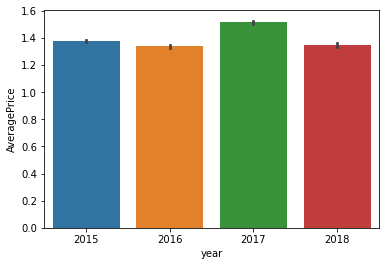

In [17]:
sns.barplot(x='year', y = 'AveragePrice', data = avd)

* in 2017 the price gone little high

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

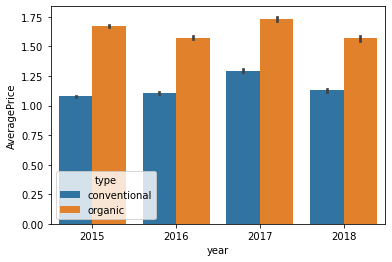

In [18]:
sns.barplot(x='year', y = 'AveragePrice', data = avd, hue = 'type')

1. conventional avacados have prices in the range of 1-1.25 all the 4 years.
2. organic avacados have prices in the range of 1.50-1.75 all the four years.

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

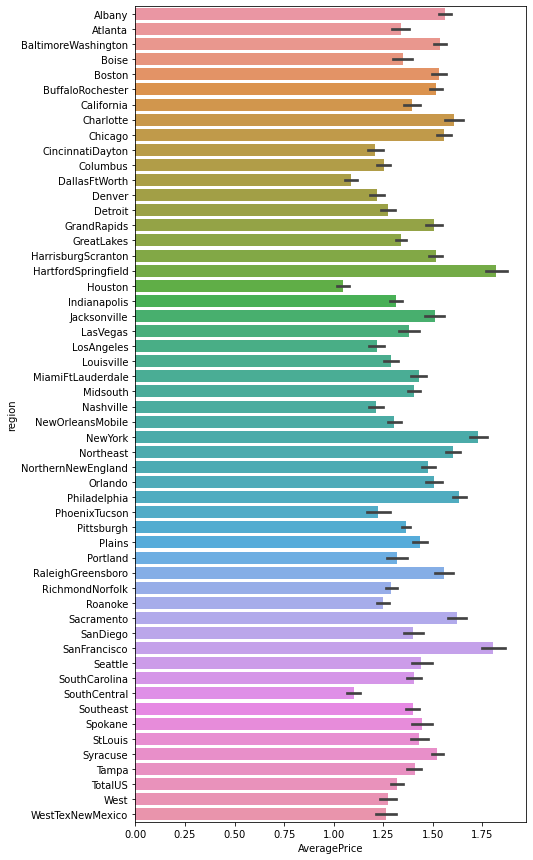

In [24]:
plt.figure(figsize=(7,15))
sns.barplot(y = 'region', x='AveragePrice', data = avd)

<AxesSubplot:xlabel='AveragePrice', ylabel='region'>

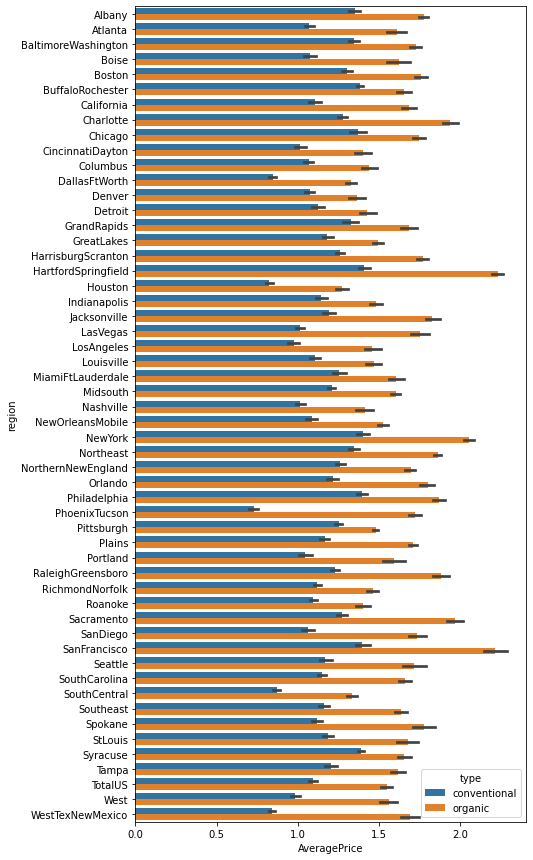

In [25]:
plt.figure(figsize=(7,15))
sns.barplot(y = 'region', x='AveragePrice', data = avd, hue = 'type')

1. for organic avacado prices are high and fluctuating by region
2. for conventional prices are low and not much fluctuating according to region

<AxesSubplot:xlabel='AveragePrice', ylabel='year'>

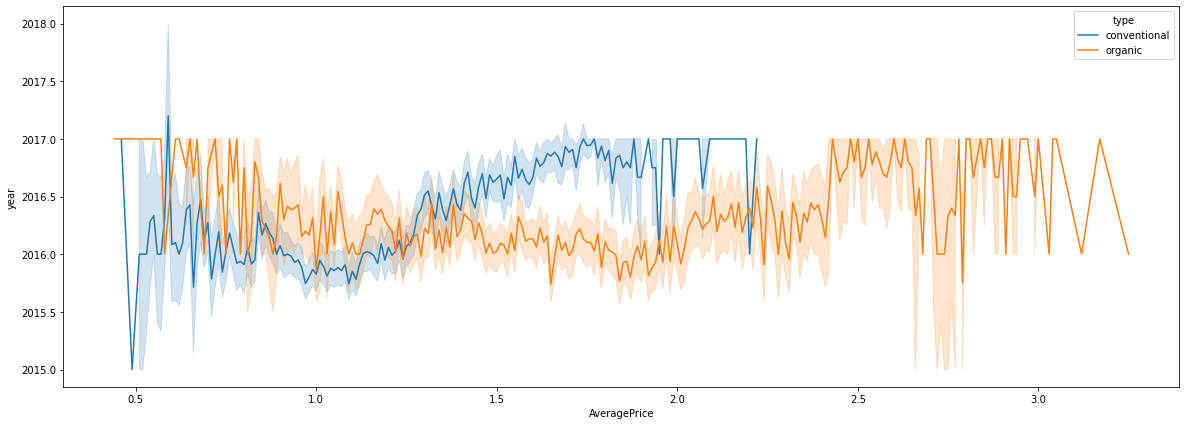

In [28]:
plt.figure(figsize=(20,7))
sns.lineplot(x = 'AveragePrice', y = 'year', data = avd, hue = 'type')

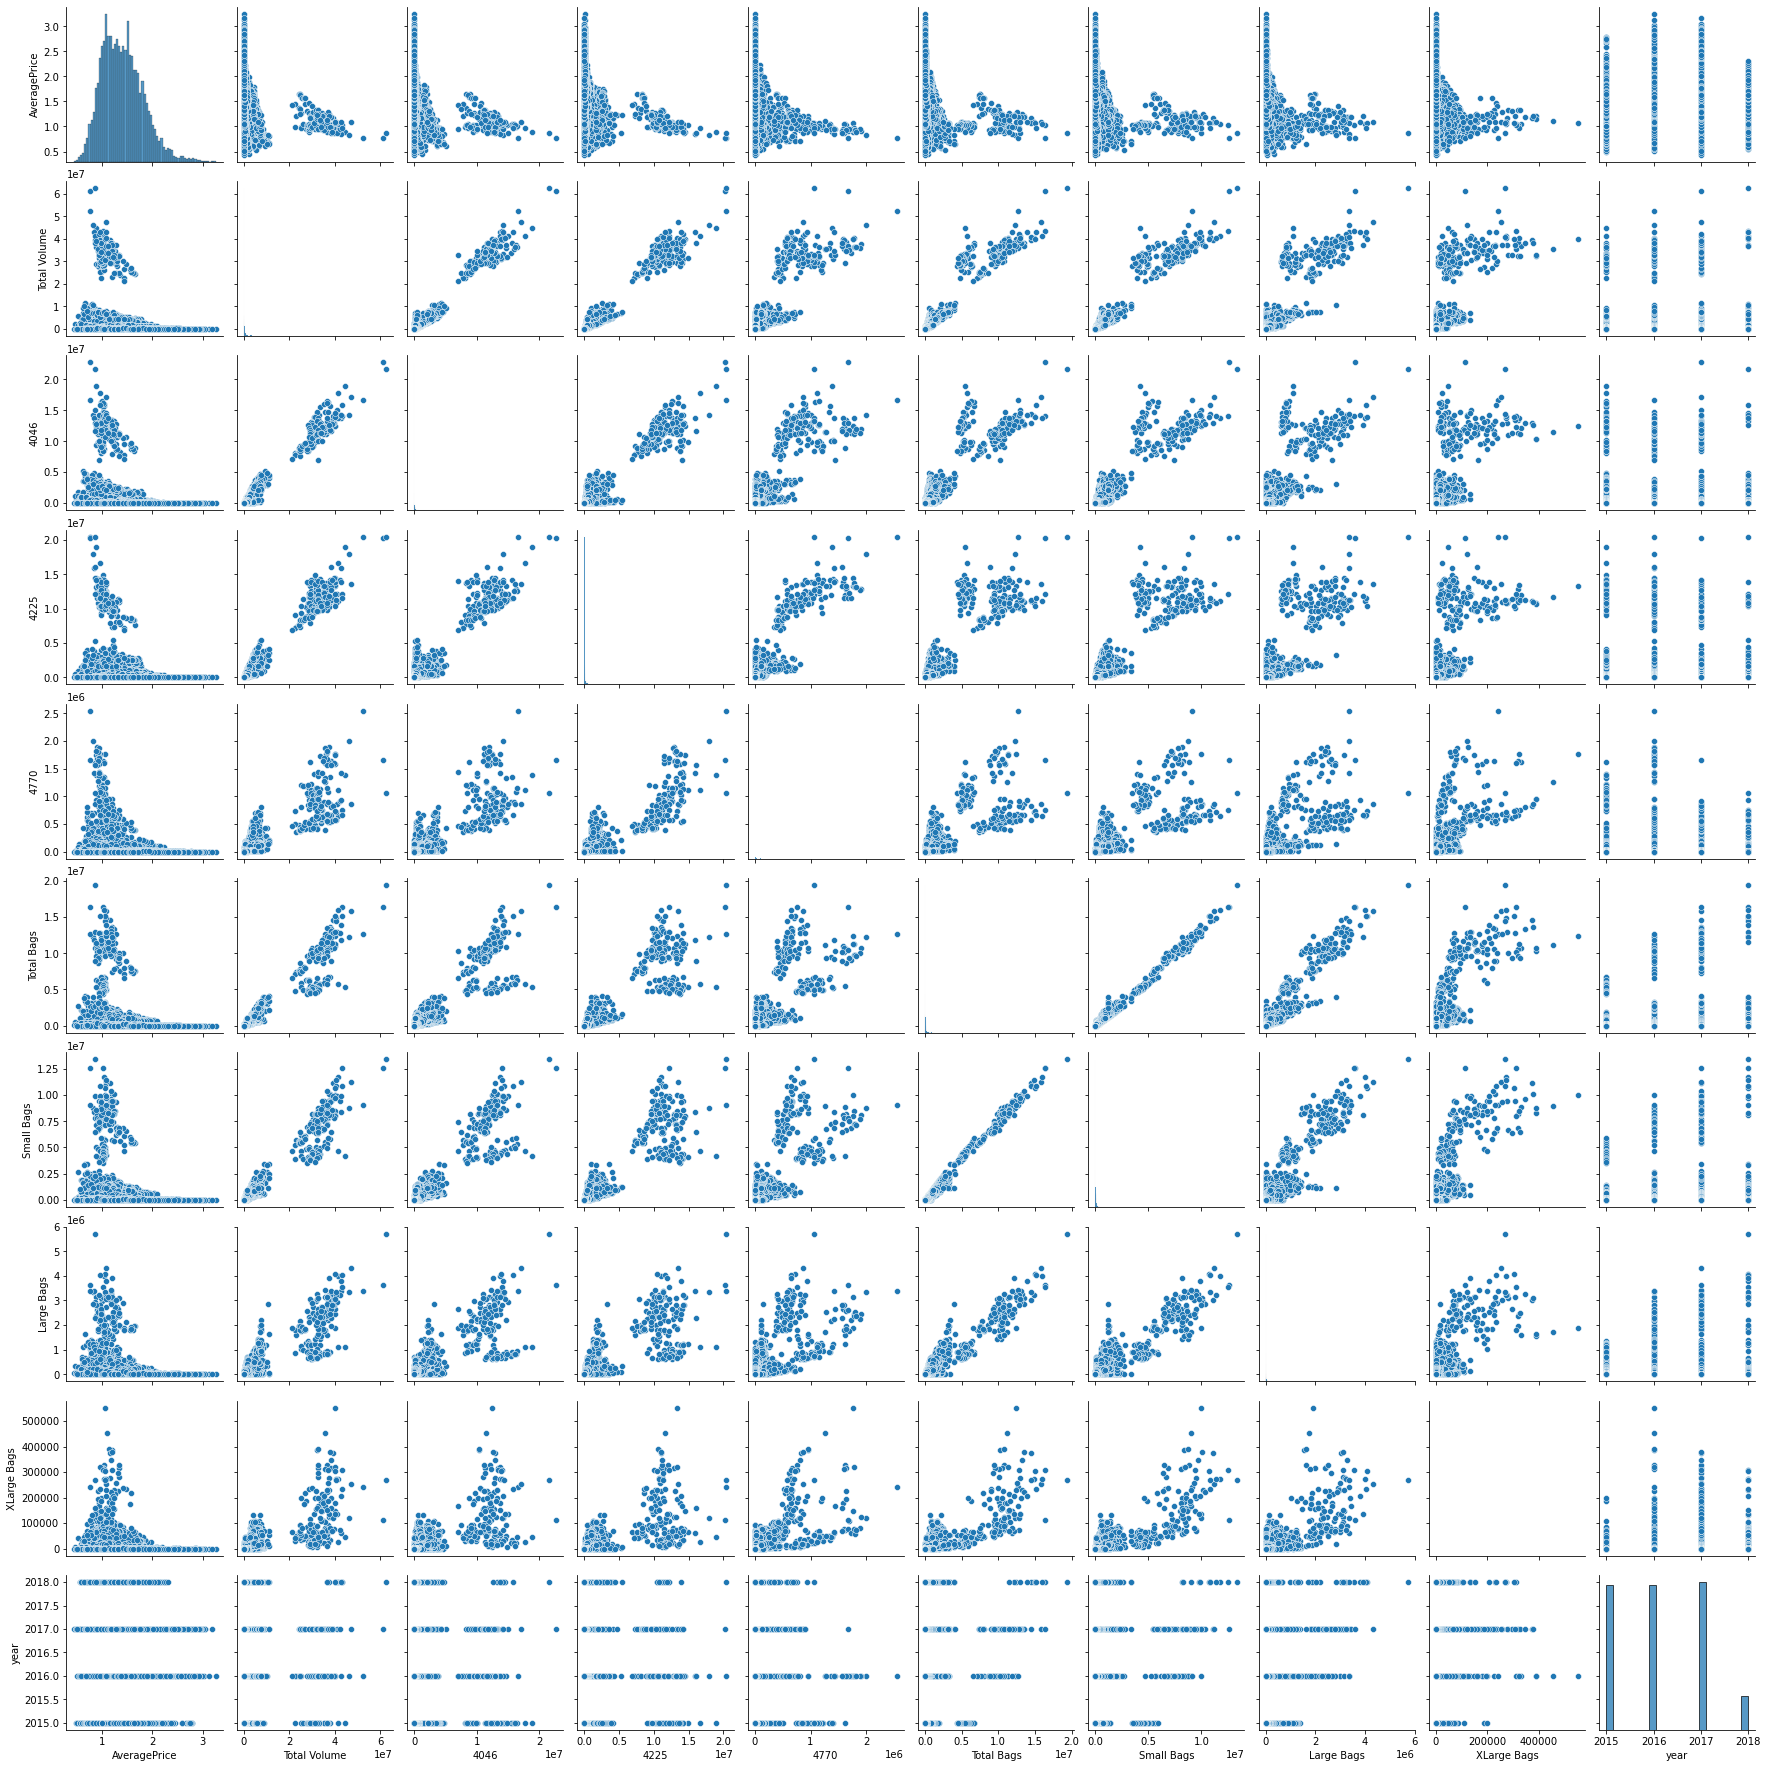

In [31]:
sns.pairplot(avd)

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

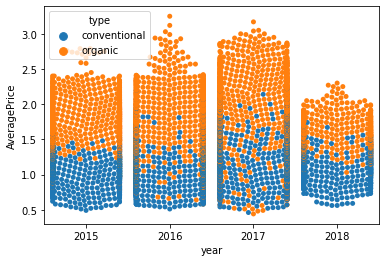

In [32]:
sns.swarmplot(y = 'AveragePrice', x = 'year', data = avd, hue = 'type')

* in 2017 there is a major mixup in organic and conventional prices, may be those are ouliers as organic prices have a downfall to 0.5 in the same year where its peak to 3.

AveragePrice        AxesSubplot(0.125,0.71587;0.133621x0.16413)
Total Volume     AxesSubplot(0.285345,0.71587;0.133621x0.16413)
4046              AxesSubplot(0.44569,0.71587;0.133621x0.16413)
4225             AxesSubplot(0.606034,0.71587;0.133621x0.16413)
4770             AxesSubplot(0.766379,0.71587;0.133621x0.16413)
Total Bags         AxesSubplot(0.125,0.518913;0.133621x0.16413)
Small Bags      AxesSubplot(0.285345,0.518913;0.133621x0.16413)
Large Bags       AxesSubplot(0.44569,0.518913;0.133621x0.16413)
XLarge Bags     AxesSubplot(0.606034,0.518913;0.133621x0.16413)
year            AxesSubplot(0.766379,0.518913;0.133621x0.16413)
dtype: object

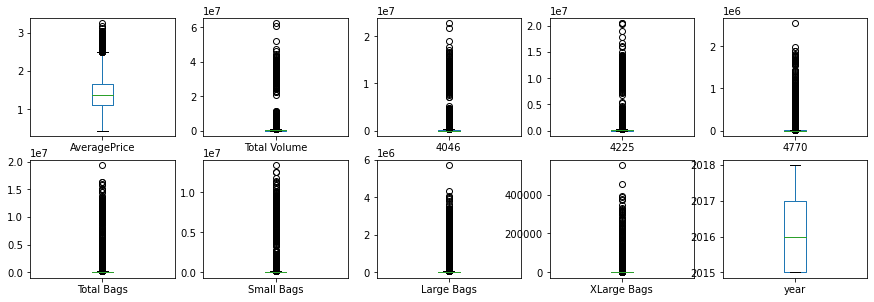

In [36]:
avd.plot(kind = 'box', subplots = True, layout = (4,5), figsize=(15,10))

* we have to remove outliers from the data 

<AxesSubplot:>

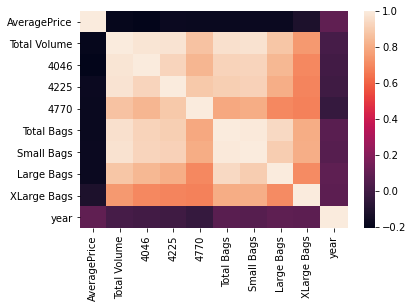

In [37]:
sns.heatmap(avd.corr())

* we have to scale the data so it get better correlations with average price

## data preprocessing



#### drop and encoding

In [166]:
avd = avd.drop('Date', axis =1)

In [167]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(avd['type'])
letype = le.transform(avd['type'])

In [168]:
# encoding for year
year_ = []
for i in avd['year']:
    if i == 2015:
        year_.append(.15)
    elif i == 2016:
        year_.append(.16)
    elif i == 2017:
        year_.append(.17)
    else:
        year_.append(.18)

In [169]:
avd['year'] = year_
avd['type'] = letype

In [170]:
avd

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0.15,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0.15,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0.15,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0.15,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0.15,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,0.18,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,0.18,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,0.18,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,0.18,WestTexNewMexico


In [171]:
region = pd.get_dummies(avd['region'])
region

,Albany,Atlanta,BaltimoreWashington,Boise,Boston,BuffaloRochester,California,Charlotte,Chicago,CincinnatiDayton,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [172]:
avd.drop('region',axis =1, inplace = True)

In [173]:
avd.drop(['Small Bags','Large Bags','XLarge Bags'], axis = 1, inplace= True)

In [174]:
avd

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0.15
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0.15
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0.15
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0.15
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0.15
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,0.18
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,0.18
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,0.18
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,0.18


In [175]:
avd.rename(columns= {'4046': 'S/M size', '4225':'L size', '4770':'XL size'}, inplace = True)

In [176]:
avd

,AveragePrice,Total Volume,S/M size,L size,XL size,Total Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0.15
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0.15
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0.15
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0.15
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0.15
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,0.18
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,0.18
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,0.18
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,0.18


### removing ouliers

In [177]:
from scipy.stats import zscore
z = np.abs(zscore(avd))
z

array([[0.18868864, 0.22771641, 0.23081597, ..., 0.23417028, 0.99983562,
        1.22128204],
       [0.13901962, 0.23042664, 0.23110251, ..., 0.23335029, 0.99983562,
        1.22128204],
       [1.18206895, 0.21208462, 0.23100731, ..., 0.23472951, 0.99983562,
        1.22128204],
       ...,
       [1.15237477, 0.24233073, 0.2306933 , ..., 0.2334633 , 1.00016441,
        1.97050371],
       [1.30138182, 0.24162464, 0.2304279 , ..., 0.23186585, 1.00016441,
        1.97050371],
       [0.53151208, 0.24125273, 0.22934712, ..., 0.23080663, 1.00016441,
        1.97050371]])

In [178]:
print(np.where(z>3))

(array([  346,   359,   783, ..., 17304, 17402, 17428], dtype=int64), array([2, 2, 4, ..., 0, 0, 0], dtype=int64))


In [179]:
avd = avd[(z<3).all(axis =1)]
avd

,AveragePrice,Total Volume,S/M size,L size,XL size,Total Bags,type,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,0,0.15
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,0,0.15
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,0,0.15
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,0,0.15
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,0,0.15
...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,1,0.18
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,1,0.18
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,1,0.18
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,1,0.18


###  scaling

In [180]:
avd.iloc[:,1:6]

,Total Volume,S/M size,L size,XL size,Total Bags
0,64236.62,1036.74,54454.85,48.16,8696.87
1,54876.98,674.28,44638.81,58.33,9505.56
2,118220.22,794.70,109149.67,130.50,8145.35
3,78992.15,1132.00,71976.41,72.58,5811.16
4,51039.60,941.48,43838.39,75.78,6183.95
...,...,...,...,...,...
18244,17074.83,2046.96,1529.20,0.00,13498.67
18245,13888.04,1191.70,3431.50,0.00,9264.84
18246,13766.76,1191.92,2452.79,727.94,9394.11
18247,16205.22,1527.63,2981.04,727.01,10969.54


In [181]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
rs.fit(avd.iloc[:,1:6])

RobustScaler()

In [182]:
rs_trnf = rs.transform(avd.iloc[:,1:6])

In [183]:
avd.iloc[:,1:6] = rs_trnf

In [184]:
avd

,AveragePrice,Total Volume,S/M size,L size,XL size,Total Bags,type,year
0,1.33,-0.100561,-0.069852,0.199687,-0.022444,-0.299159,0,0.15
1,1.35,-0.124140,-0.073396,0.125914,-0.020637,-0.291130,0,0.15
2,0.93,0.035436,-0.072218,0.610747,-0.007814,-0.304634,0,0.15
3,1.08,-0.063388,-0.068920,0.331370,-0.018105,-0.327806,0,0.15
4,1.28,-0.133807,-0.070783,0.119898,-0.017536,-0.324105,0,0.15
...,...,...,...,...,...,...,...,...
18244,1.63,-0.219373,-0.059974,-0.198078,-0.031001,-0.251490,1,0.18
18245,1.71,-0.227401,-0.068337,-0.183781,-0.031001,-0.293520,1,0.18
18246,1.87,-0.227707,-0.068335,-0.191136,0.098336,-0.292237,1,0.18
18247,1.93,-0.221563,-0.065052,-0.187166,0.098170,-0.276597,1,0.18


In [185]:
avd_new = pd.concat([avd,region], axis =1)

In [186]:
avd_new

,AveragePrice,Total Volume,S/M size,L size,XL size,Total Bags,type,year,Albany,Atlanta,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,-0.100561,-0.069852,0.199687,-0.022444,-0.299159,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.124140,-0.073396,0.125914,-0.020637,-0.291130,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,0.035436,-0.072218,0.610747,-0.007814,-0.304634,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.063388,-0.068920,0.331370,-0.018105,-0.327806,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.133807,-0.070783,0.119898,-0.017536,-0.324105,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.219373,-0.059974,-0.198078,-0.031001,-0.251490,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,-0.227401,-0.068337,-0.183781,-0.031001,-0.293520,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,-0.227707,-0.068335,-0.191136,0.098336,-0.292237,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,-0.221563,-0.065052,-0.187166,0.098170,-0.276597,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1


In [187]:
avd_new.dropna(inplace = True)

In [188]:
avd_new

,AveragePrice,Total Volume,S/M size,L size,XL size,Total Bags,type,year,Albany,Atlanta,...,SouthCarolina,SouthCentral,Southeast,Spokane,StLouis,Syracuse,Tampa,TotalUS,West,WestTexNewMexico
0,1.33,-0.100561,-0.069852,0.199687,-0.022444,-0.299159,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,-0.124140,-0.073396,0.125914,-0.020637,-0.291130,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,0.035436,-0.072218,0.610747,-0.007814,-0.304634,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,-0.063388,-0.068920,0.331370,-0.018105,-0.327806,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,-0.133807,-0.070783,0.119898,-0.017536,-0.324105,0.0,0.15,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,-0.219373,-0.059974,-0.198078,-0.031001,-0.251490,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18245,1.71,-0.227401,-0.068337,-0.183781,-0.031001,-0.293520,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18246,1.87,-0.227707,-0.068335,-0.191136,0.098336,-0.292237,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1
18247,1.93,-0.221563,-0.065052,-0.187166,0.098170,-0.276597,1.0,0.18,0,0,...,0,0,0,0,0,0,0,0,0,1


# now all the data has been scaled, ouliers removed and encoded. and we are ready to build model.

<AxesSubplot:>

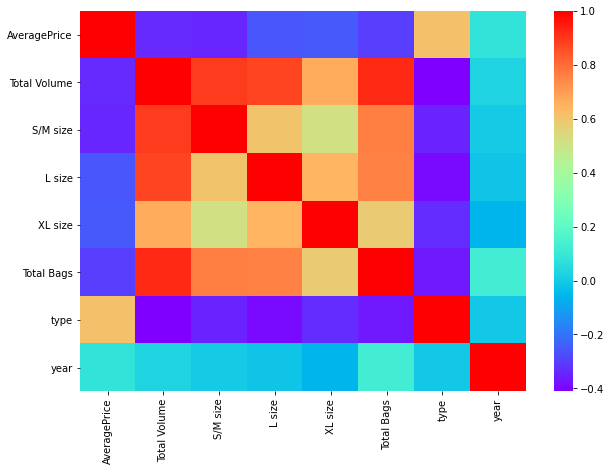

In [197]:
plt.figure(figsize=(10,7))
sns.heatmap(avd_new.iloc[:,:8].corr(), cmap = 'rainbow')

## model building

In [200]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, roc_auc_score,roc_curve
from sklearn.model_selection import cross_val_score, GridSearchCV

In [201]:
lr = LinearRegression()
rfr = RandomForestRegressor()
abr = AdaBoostRegressor()
etr = ExtraTreesRegressor()
gbr = GradientBoostingRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()

In [203]:
X = avd_new.drop('AveragePrice', axis =1)
y = avd_new['AveragePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=37)

In [206]:
models = [lr,rfr,abr,etr,gbr,dtr,svr]
for m in models:
    m.fit(X_train,y_train)
    pred_m = m.predict(X_test)
    
    
    print(f'{m} Model Report')
    print('MAE:', mean_absolute_error(y_test,pred_m))
    print('MSE:', mean_squared_error(y_test,pred_m))
    print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_m)))
    print('R2 SCORE:', r2_score(y_test,pred_m))
    print('\n')

LinearRegression() Model Report
MAE: 0.19451786403006463
MSE: 0.06440941644351847
RMSE: 0.25379010312366096
R2 SCORE: 0.5668510423137985


RandomForestRegressor() Model Report
MAE: 0.10682065623937435
MSE: 0.022427301290377424
RMSE: 0.14975747490652153
R2 SCORE: 0.8491779197198589


AdaBoostRegressor() Model Report
MAE: 0.22363930242314278
MSE: 0.07732047450874836
RMSE: 0.2780655938960237
R2 SCORE: 0.48002505238289417


ExtraTreesRegressor() Model Report
MAE: 0.09374663379802788
MSE: 0.017945415870452223
RMSE: 0.13396050115781227
R2 SCORE: 0.8793182952317525


GradientBoostingRegressor() Model Report
MAE: 0.16994580664628
MSE: 0.04967197706907901
RMSE: 0.2228721092220357
R2 SCORE: 0.6659593226938858


DecisionTreeRegressor() Model Report
MAE: 0.14408194491669502
MSE: 0.04583439306358381
RMSE: 0.21408968462675593
R2 SCORE: 0.6917668148867568


SVR() Model Report
MAE: 0.17510570976524306
MSE: 0.05544112551060288
RMSE: 0.23545939248754313
R2 SCORE: 0.6271621906569209




### we got two better models with respect to r2 score, and we further elaborate more on this two models.
1. Random Forest Regressor
2. Extra Tree Regressor

In [217]:
rfr_param = {
    'n_estimators':[100,500],
    'criterion': ['mse', 'mae'],
    'max_depth': [10,20,30],
}

In [220]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mae', max_depth=10)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.10747698061883712
MSE: 0.02260563504250255
RMSE: 0.15035170448818513
R2 SCORE: 0.847978637330443


In [221]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=20)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.10690999659979597
MSE: 0.02237727822849371
RMSE: 0.1495903681006692
R2 SCORE: 0.8495143214187347


In [222]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mae', max_depth=20)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.10711434886093167
MSE: 0.022481212883373
RMSE: 0.1499373632000143
R2 SCORE: 0.8488153679129548


In [223]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mae', max_depth=30)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.1069606936416185
MSE: 0.02240514492349541
RMSE: 0.14968348246715604
R2 SCORE: 0.849326919784616


In [224]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=10)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.10677290037402243
MSE: 0.022240662975178512
RMSE: 0.14913303783930143
R2 SCORE: 0.8504330497327757


In [225]:
rfr2 = RandomForestRegressor(n_estimators=500, criterion='mse', max_depth=30)
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.10718056783407007
MSE: 0.022522069637878273
RMSE: 0.1500735474288466
R2 SCORE: 0.8485406090095897


In [226]:
etr_param = {
    'n_estimators':[100,500],
    'criterion': ['mse', 'mae'],
    'max_depth': [10,20,30],
}

In [238]:
etr2 = ExtraTreesRegressor(n_estimators=500, criterion='mse', max_depth=10)
etr2.fit(X_train,y_train)
pred_etr2 = etr2.predict(X_test)

print(f'{etr2} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_etr2))
print('MSE:', mean_squared_error(y_test,pred_etr2))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_etr2)))
print('R2 SCORE:', r2_score(y_test,pred_etr2))

ExtraTreesRegressor(max_depth=10, n_estimators=500) Model Report
MAE: 0.1791526961477147
MSE: 0.05735225379819457
RMSE: 0.23948330588622366
R2 SCORE: 0.6143099825251974


In [239]:
etr2 = ExtraTreesRegressor(n_estimators=500, criterion='mse', max_depth=20)
etr2.fit(X_train,y_train)
pred_etr2 = etr2.predict(X_test)

print(f'{etr2} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_etr2))
print('MSE:', mean_squared_error(y_test,pred_etr2))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_etr2)))
print('R2 SCORE:', r2_score(y_test,pred_etr2))

ExtraTreesRegressor(max_depth=20, n_estimators=500) Model Report
MAE: 0.1364229211469422
MSE: 0.036247446778283655
RMSE: 0.19038762243981003
R2 SCORE: 0.756238378520823


In [240]:
etr2 = ExtraTreesRegressor(n_estimators=500, criterion='mse', max_depth=30)
etr2.fit(X_train,y_train)
pred_etr2 = etr2.predict(X_test)

print(f'{etr2} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_etr2))
print('MSE:', mean_squared_error(y_test,pred_etr2))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_etr2)))
print('R2 SCORE:', r2_score(y_test,pred_etr2))

ExtraTreesRegressor(max_depth=30, n_estimators=500) Model Report
MAE: 0.11118232852566476
MSE: 0.024641658668646923
RMSE: 0.15697661822273698
R2 SCORE: 0.8342865165166755


In [243]:
cv = cross_val_score(rfr,X, y, cv=5)
print(cv)
print('mean value:', cv.mean())

[ 0.1685644   0.32581274  0.54713063  0.36105049 -0.25122699]
mean value: 0.23026625451012012


In [244]:
cv = cross_val_score(rfr2,X, y, cv=5)
print(cv)
print('mean value:', cv.mean())

[ 0.15528925  0.30008979  0.54889322  0.3763936  -0.25553326]
mean value: 0.22502652222455827


In [245]:
cv = cross_val_score(etr,X, y, cv=5)
print(cv)
print('mean value:', cv.mean())

[ 0.14728509  0.27129945  0.54205788  0.37895507 -0.14610022]
mean value: 0.23869945257839106


# NOTE -: WE DID PARAMETER TUNNING MANUALLY BECAUSE GRIDSEARCH CV IS TAKING MUCH MORE TIME.
# comparing all the r2 score and metrics we are able to choose the best model-:

In [237]:
etr = ExtraTreesRegressor()
etr.fit(X_train,y_train)
pred_etr = etr.predict(X_test)

print(f'{etr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_etr))
print('MSE:', mean_squared_error(y_test,pred_etr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_etr)))
print('R2 SCORE:', r2_score(y_test,pred_etr))

ExtraTreesRegressor(max_depth=20, n_estimators=500) Model Report
MAE: 0.1364532168520036
MSE: 0.03627722250654943
RMSE: 0.1904658040346073
R2 SCORE: 0.7560381387674636


In [249]:
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
pred_rfr = rfr.predict(X_test)

print(f'{rfr} Model Report')
print('MAE:', mean_absolute_error(y_test,pred_rfr))
print('MSE:', mean_squared_error(y_test,pred_rfr))
print('RMSE:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 SCORE:', r2_score(y_test,pred_rfr))

RandomForestRegressor() Model Report
MAE: 0.1069119177150629
MSE: 0.022450580525331516
RMSE: 0.1498351778633159
R2 SCORE: 0.8490213684434638


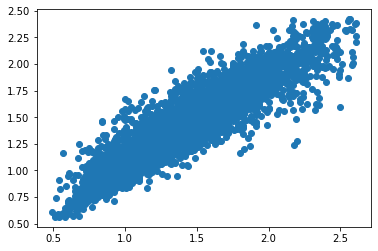

In [250]:
plt.scatter(y_test,pred_rfr)

# saving the best Model

In [252]:
import joblib
joblib.dump(rfr, 'rfrfile.obj')

['rfrfile.obj']